# <font color=black>Hotel booking cancellation prediction</font>

# <font color=purple>Understand the problem</font>

Predicting Hotel Booking Cancellation whether a booking will be cancelled or a booking will not be cancelled using machine learning based on data. since the booking will be cancelled or not cancelled is an classification project.


# Problem Statement:
    
    
With the increase trend of cancellation from year to year, some hotel have think that high cancellation inhotel is the new norm of the industry which is completely wrong approach.One out of four hotel guests are cancelling hotelbooking ahead of a stay. This cancellation trend has effect the hotel not being able to accurately forecast occupancy within their revenue management.This trend of cancellation also have causes hotel loss in opportunity cost (unsold room due to cancellation)

# <font color=brown>Project Goals</font>
1. The Goals of this project is to find out the
characteristic of customers who cancelled
and finding a pattern in cancelled booking by
doing an exploratory data analysis
2. Building classification machine learning model
to predict cancellation, that has accuracy
score around 0.75 - 0.9
3. Build and Deploy web application / dashboard
using flask from our machine l

# Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <font color=purple>Get Data</font>

# <font color=green>Import Libraries</font>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px

In [ ]:
hotel_booking=pd.read_excel("/content/drive/MyDrive/datasets/HOTEL BOOKING CANCELLATION.xlsx")
hotel_booking.sample(10)
df = hotel_booking

In [ ]:
# To know about the number of rows and columns
hotel_booking.shape

(119390, 32)

In [ ]:
# To know about the information of columns and data type
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [ ]:
# Getting the information about max,min,std etc...
hotel_booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# <font color=purple>Exploratory Data Analysis [Data Visualization]</font>

# There are two types of hotels,in which approximately less number  was booked for resort hotel and the rest of was booked for City Hotel.

# Below graph represents the difference between canceled and not canceled situation and in which hotel
   
    


1=canceled
0= not canceled


# Cancellation split between type of hotels

Text(0.5, 1.0, 'number of cancellations')

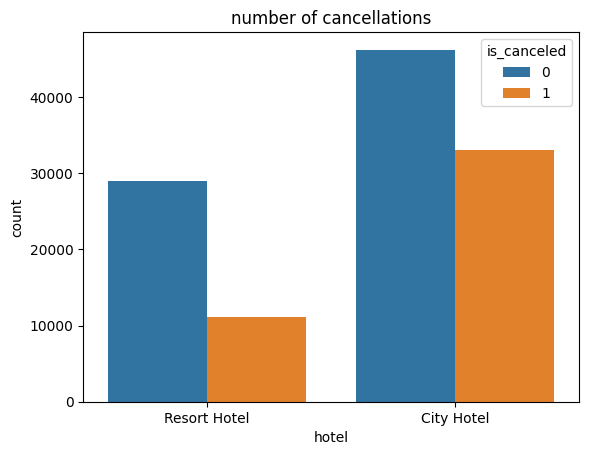

In [ ]:
sns.countplot(data=hotel_booking, x='hotel', hue='is_canceled')
plt.title("number of cancellations")
#plotting no of cancellations

By graphical representation there are two types of hotel resort and city,among which canceling rate is more in city hotel when compared to resort hotel

# Comparative view of type of hotel booked over the years and cancellation status

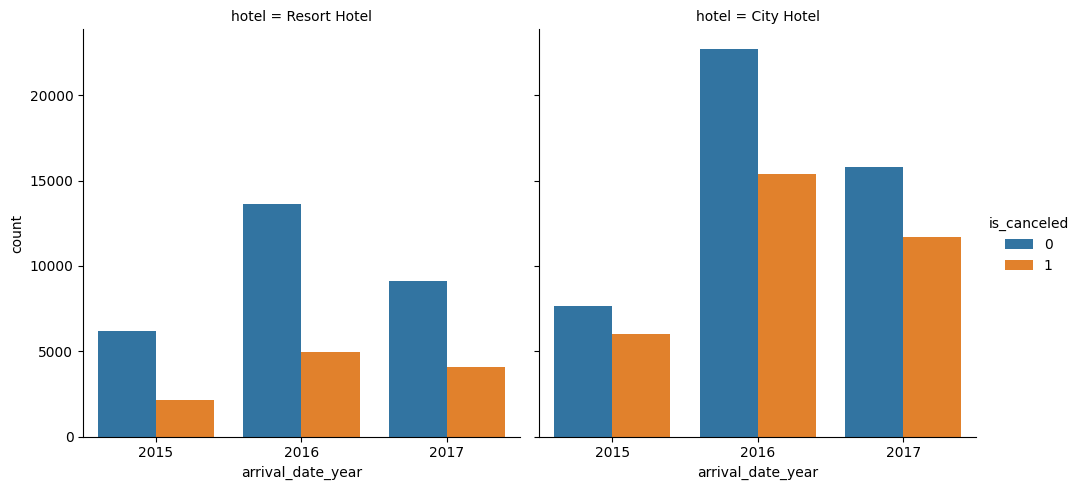

In [ ]:
sns.catplot(x ="arrival_date_year", hue="is_canceled", col="hotel", data = hotel_booking, kind="count")
plt.show()

The booking and cancelling rate is high in city hotel in the year of 2016

Number of booking is high in the month of august in city hotel and also the canceling rate is also high

Text(0, 0.5, 'Number of bookings')

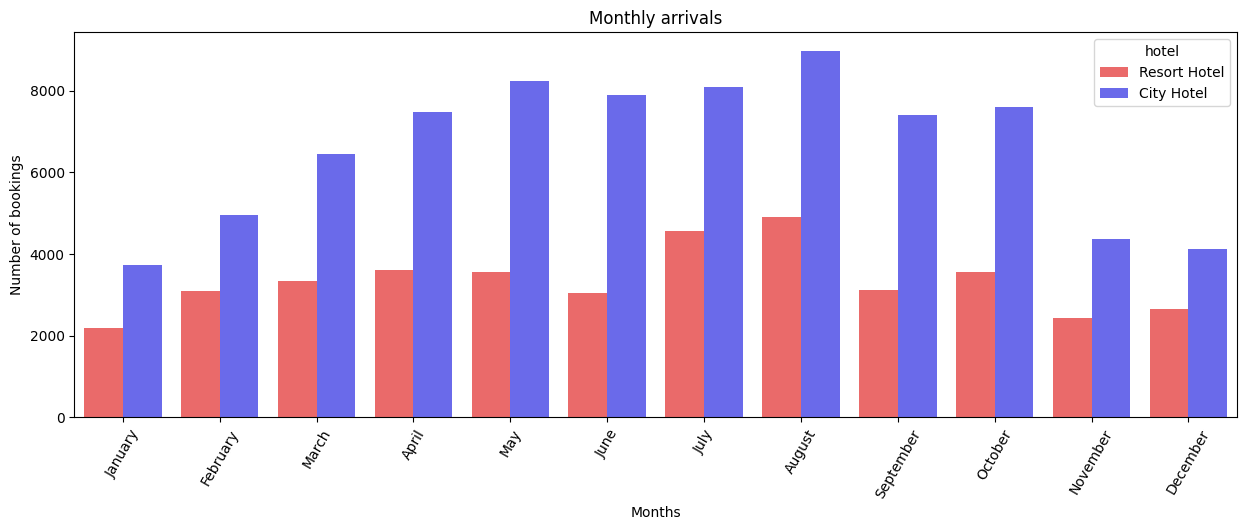

In [ ]:
fig = plt.figure(figsize = (15,5))
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

sns.countplot(data = hotel_booking,x = 'arrival_date_month',hue = 'hotel',palette ="seismic_r",order=months)
plt.title('monthly arrivals actross the months and hotel type ', fontsize=14)
plt.xticks(rotation = 60)
plt.title('Monthly arrivals', )
plt.xlabel('Months')
plt.ylabel('Number of bookings')

Cancelations among new guests=  0.3778508392455442
Cancelations among old guests=  0.14488188976377953


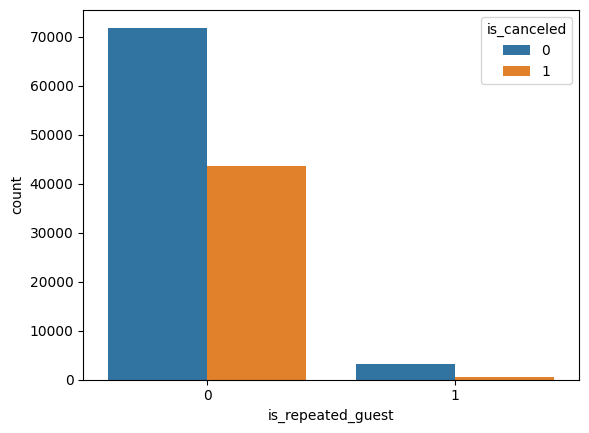

In [ ]:
sns.countplot(data=hotel_booking, x='is_repeated_guest', hue='is_canceled')
new_guest = hotel_booking[(hotel_booking['is_repeated_guest']==0) & (hotel_booking['is_canceled']==1)]
old_guest = hotel_booking[(hotel_booking['is_repeated_guest']==1) & (hotel_booking['is_canceled']==1)]
print('Cancelations among new guests= ', (len(new_guest))/(len(hotel_booking[hotel_booking['is_repeated_guest']==0])))
print('Cancelations among old guests= ', (len(old_guest))/(len(hotel_booking[hotel_booking['is_repeated_guest']==1])))

Text(0.5, 1.0, 'Pie Chart for Most Preffered  Hotel')

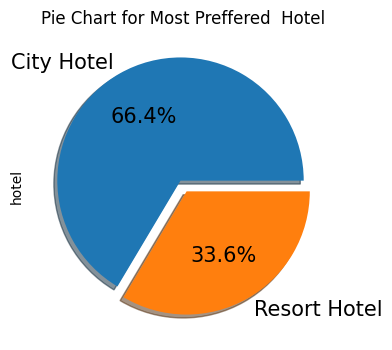

In [ ]:
#Data Visualization

df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%',shadow=True,  figsize=(6,4),fontsize=15)
plt.title('Pie Chart for Most Preffered  Hotel')

#Pie chart to visualize the ratio between Resort hotel and City hotel

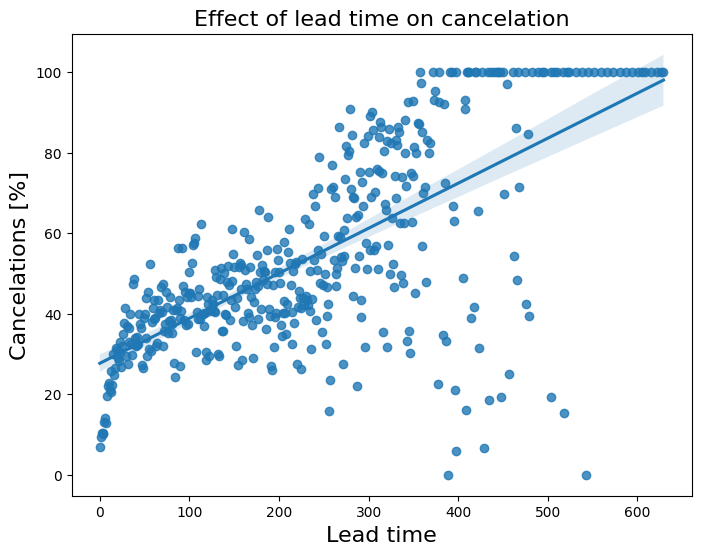

In [ ]:
#Effect of  using scatter plotlead_time on cancellation


# group data for lead_time:
lead_cancel_data = df.groupby("lead_time")["is_canceled"].describe()
# use only lead_times wih more than 10 bookings for graph:
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

#show figure:
plt.figure(figsize=(8, 6))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0,365)
plt.show()

#Bookings made few days before are rarely canceled, whereas bookings made one year in advance are canceled very often

<ipython-input-78-00c88a78bf7a>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation Matrix of the Hotel Booking')

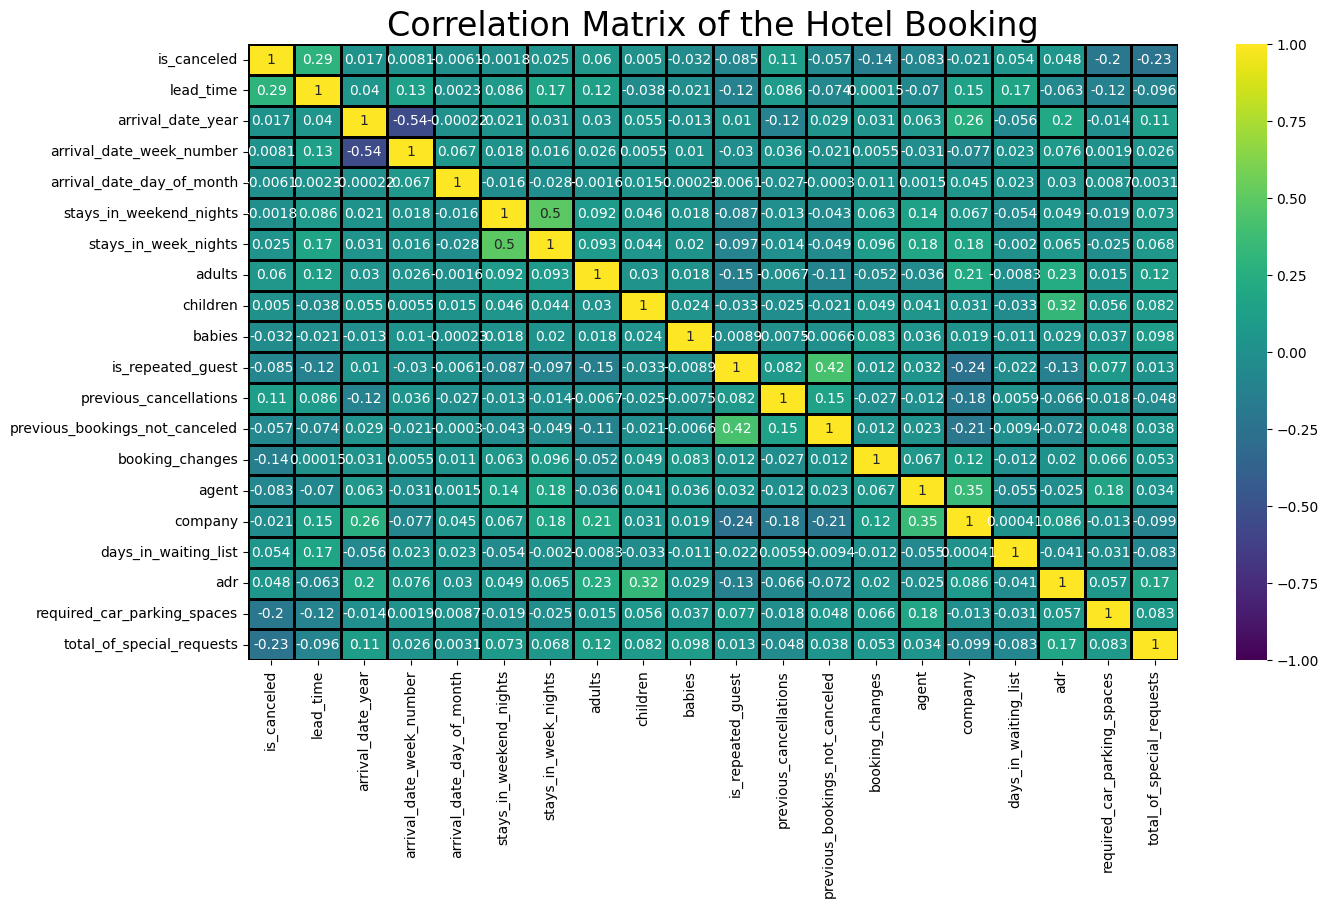

In [ ]:
hotel_booking_df = df.copy()
plt.figure(figsize=(15, 8))
correlation = sns.heatmap(hotel_booking_df.corr(), vmin=-1, vmax=1, annot=True, linewidths=1, linecolor='black', cmap = "viridis")
correlation.set_title('Correlation Matrix of the Hotel Booking', fontdict={'fontsize': 24})

The above graph bolsters the evidence that maximum customers are new comers and they are less likely to cancel their current booking. Old guests are less likely to cancel the booking.

# <font color=purple>Data preprocessing</font>

in order to preprocess the data we have to find the missing values

In [ ]:
hotel_booking.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# Fill missing data

hotel_booking['children'] = hotel_booking['children'].fillna(0)
hotel_booking['country'] = hotel_booking['country'].fillna(hotel_booking['country'].mode().index[0])
hotel_booking['agent']= hotel_booking['agent'].fillna('0')
hotel_booking=hotel_booking.drop(['company'], axis =1)

In [ ]:
hotel_booking.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [ ]:
df['adr'].unique()

array([  0.  ,  75.  ,  98.  , ..., 266.75, 209.25, 157.71])

In [ ]:
df.describe()

#Checking for outliers
#Outlier is  value that lies in an abnormal distance from other values.
#If we observe the mean and min or max values of all columns, adr column has a negative value, and the minimum value is
#extremely far from mean value, which means the minimum value is an outlier.

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: xlabel='adr'>

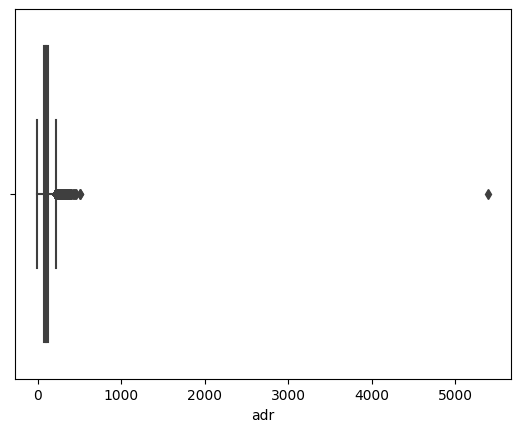

In [ ]:
sns.boxplot(x=df['adr'])

#We can visualize outliers using boxplot

In [ ]:
df[df['adr'] <0]
#Resulting any value of adr column which has negative values

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,No Deposit,273.0,NaN,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [ ]:
df = df.drop(df[df.adr < 0].index)
df[df['adr'] < 0]
#Dropping the negative value row and printing to check if there are any more negative values
#We get 0 rows that means no more negative values.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [ ]:
df[df['adr']> 5000]

#If we observe the boxplot above, there is only one value above 5000 which is at extreme compared to others

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,Non Refund,12.0,NaN,0,Transient,5400.0,0,0,Canceled,2016-02-19


In [ ]:
df = df.drop(df[df.adr > 5000].index)
df[df['adr']> 5000]

#Dropping the row with 5000

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [ ]:
df[df['adults']+df['babies']+df['children'] == 0].shape

#There are some rows which has adults,babies,children equal to 0.
#No booking cab be made with adult/children 0. So, check if there are any rows of the above kind.
#There are 180 rows of suck kind, Our algorithm will not learn anything from these rows.
#Dropping all the rows which satisfy above conditiondf1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace = True)


(180, 32)

In [ ]:
df.drop(df[df['adults']+df['babies']+df['children'] == 0].index, inplace = False)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# dropping columns that are not useful

useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

hotel_booking.drop(useless_col, axis = 1, inplace = True)
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,...,0,0,C,No Deposit,0,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,...,0,0,C,No Deposit,0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,0,0,A,No Deposit,0,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,0,0,A,No Deposit,304.0,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,0,0,A,No Deposit,240.0,Transient,98.0,0,1,2015-07-03


In [ ]:
# Change data structure

hotel_booking['agent']=hotel_booking['agent'].astype(int)
#hotel_booking['country']= hotel_booking['country'].astype(str)

Another part is analyzing categorical features. Categorical labels converted into numerical form. This will help to be more understandable and implementable into machine learning algorithms. Some features are not ordinal such as country. In that case, One-Hot Encoding could be chosen. Due to the high number of categories, this method could incur higher computational cost. To help reducing that, Label Encoding method will be used.

In [ ]:
#Using Label Encoder method for categorical features

labelencoder = LabelEncoder()
hotel_booking['hotel'] = labelencoder.fit_transform(hotel_booking['hotel'])
hotel_booking['meal'] = labelencoder.fit_transform(hotel_booking['meal'])
hotel_booking['market_segment']= labelencoder.fit_transform(hotel_booking['market_segment'])
hotel_booking['distribution_channel']=labelencoder.fit_transform(hotel_booking['distribution_channel'])
hotel_booking['reserved_room_type'] = labelencoder.fit_transform(hotel_booking['reserved_room_type'])
hotel_booking['deposit_type'] = labelencoder.fit_transform(hotel_booking['deposit_type'])
hotel_booking['agent'] = labelencoder.fit_transform(hotel_booking['agent'])
hotel_booking['customer_type'] = labelencoder.fit_transform(hotel_booking['customer_type'])


In [ ]:
hotel_booking['reservation_status_date'] = pd.to_datetime(hotel_booking['reservation_status_date'])

hotel_booking['year'] = hotel_booking['reservation_status_date'].dt.year
hotel_booking['month'] = hotel_booking['reservation_status_date'].dt.month
hotel_booking['day'] = hotel_booking['reservation_status_date'].dt.day
hotel_booking.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,year,month,day
0,1,0,342,27,1,0,0,2,0.0,0,...,2,0,0,2,0.0,0,0,2015,7,1
1,1,0,737,27,1,0,0,2,0.0,0,...,2,0,0,2,0.0,0,0,2015,7,1
2,1,0,7,27,1,0,1,1,0.0,0,...,0,0,0,2,75.0,0,0,2015,7,2
3,1,0,13,27,1,0,1,1,0.0,0,...,0,0,221,2,75.0,0,0,2015,7,2
4,1,0,14,27,1,0,2,2,0.0,0,...,0,0,174,2,98.0,0,1,2015,7,3


After encoding the categorical data, two data frames will be created. One data frame has only categorical data and another has numerical data.

In [ ]:
#Create new dataframe for categorical data

hotel_data_categorical = hotel_booking[['hotel','is_canceled','arrival_date_day_of_month','meal','market_segment','distribution_channel',
                                     'is_repeated_guest', 'reserved_room_type','deposit_type','agent',
                                     'customer_type']]
hotel_data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   hotel                      119390 non-null  int64
 1   is_canceled                119390 non-null  int64
 2   arrival_date_day_of_month  119390 non-null  int64
 3   meal                       119390 non-null  int64
 4   market_segment             119390 non-null  int64
 5   distribution_channel       119390 non-null  int64
 6   is_repeated_guest          119390 non-null  int64
 7   reserved_room_type         119390 non-null  int64
 8   deposit_type               119390 non-null  int64
 9   agent                      119390 non-null  int64
 10  customer_type              119390 non-null  int64
dtypes: int64(11)
memory usage: 10.0 MB


In [ ]:
#Create new dataframe for numerical data

hotel_data_numerical= hotel_booking.drop(['hotel','is_canceled', 'arrival_date_day_of_month','meal',
                                       'market_segment','distribution_channel',
                                       'is_repeated_guest', 'reserved_room_type',
                                       'deposit_type','agent',
                                       'customer_type'], axis = 1)
hotel_data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119390 non-null  int64  
 1   arrival_date_week_number        119390 non-null  int64  
 2   stays_in_weekend_nights         119390 non-null  int64  
 3   stays_in_week_nights            119390 non-null  int64  
 4   adults                          119390 non-null  int64  
 5   children                        119390 non-null  float64
 6   babies                          119390 non-null  int64  
 7   previous_cancellations          119390 non-null  int64  
 8   previous_bookings_not_canceled  119390 non-null  int64  
 9   adr                             119390 non-null  float64
 10  required_car_parking_spaces     119390 non-null  int64  
 11  total_of_special_requests       119390 non-null  int64  
 12  year            

# separating the the independent(x) and dependent variabe(y)

In [ ]:
x=hotel_booking.drop(["is_canceled"],axis=1)
x.head()

,hotel,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,year,month,day
0,1,342,27,1,0,0,2,0.0,0,0,...,2,0,0,2,0.0,0,0,2015,7,1
1,1,737,27,1,0,0,2,0.0,0,0,...,2,0,0,2,0.0,0,0,2015,7,1
2,1,7,27,1,0,1,1,0.0,0,0,...,0,0,0,2,75.0,0,0,2015,7,2
3,1,13,27,1,0,1,1,0.0,0,0,...,0,0,221,2,75.0,0,0,2015,7,2
4,1,14,27,1,0,2,2,0.0,0,0,...,0,0,174,2,98.0,0,1,2015,7,3


In [ ]:
y=hotel_booking["is_canceled"] # dependent variable
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

# Split the data set in training and testing=data is more taken for training better the result,for testing only we take little data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=90)

In [ ]:
x_test.head()

,hotel,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,year,month,day
46234,0,1,53,27,2,0,2,0.0,0,3,...,0,0,11,2,68.00,0,0,2015,12,29
93336,0,12,30,19,0,2,2,0.0,0,3,...,0,0,8,2,114.00,0,1,2016,7,21
94373,0,257,32,31,2,2,2,0.0,0,0,...,0,0,8,2,90.95,0,0,2016,8,4
96789,0,10,37,5,1,2,2,0.0,0,0,...,3,0,9,2,164.00,0,1,2016,9,8
98359,0,80,40,26,1,2,1,0.0,0,2,...,0,0,107,3,86.00,0,0,2016,9,29


In [ ]:
y_train.head()

23621     0
49904     0
104370    0
53805     1
81824     1
Name: is_canceled, dtype: int64

In [ ]:
x_test.sample(2)

,hotel,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,year,month,day
84536,0,4,9,26,0,2,2,0.0,0,0,...,0,0,9,2,87.0,0,1,2016,2,28
114647,0,144,25,22,0,3,2,0.0,0,0,...,3,0,9,2,126.0,0,2,2017,6,25


In [ ]:
y_test.sample(9)

93209    0
85208    0
63033    1
35127    0
25139    0
47536    1
26229    0
1799     1
64385    1
Name: is_canceled, dtype: int64

In [ ]:
# Implement standart scaler method

standardScalerX = StandardScaler()
x_train = standardScalerX.fit_transform(x_train)
x_test = standardScalerX.fit_transform(x_test)

# <font color=purple> Model Building</font>

# <font color=green>Logistic Regression</font>

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.8137616215763465
Confusion Matrix : 
[[14494   659]
 [ 3788  4937]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.96      0.87     15153
           1       0.88      0.57      0.69      8725

    accuracy                           0.81     23878
   macro avg       0.84      0.76      0.78     23878
weighted avg       0.83      0.81      0.80     23878



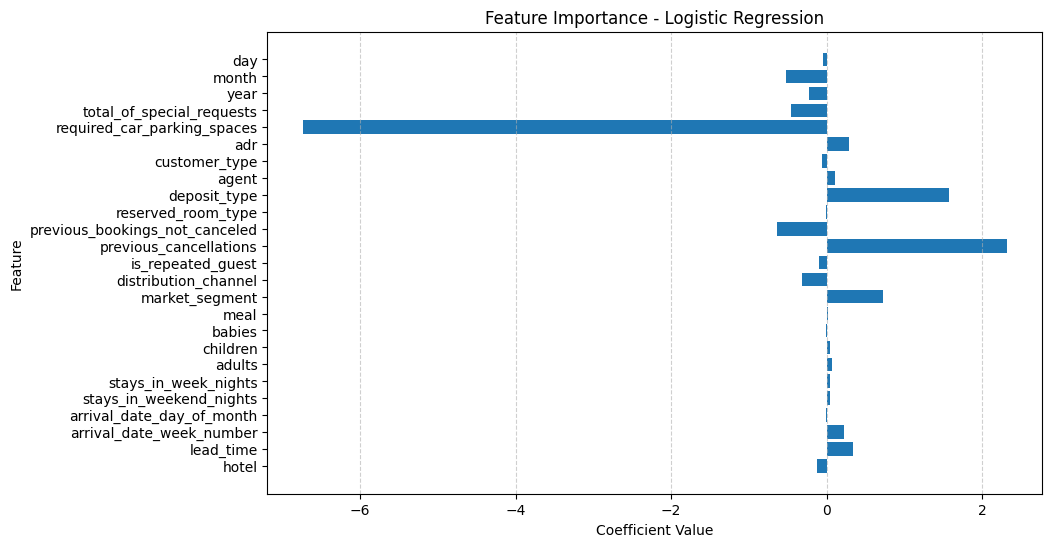

In [ ]:
# Get the coefficients (feature importances) from the model
coef = lr.coef_[0]

# Get the feature names
features = x.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, coef)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance - Logistic Regression')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

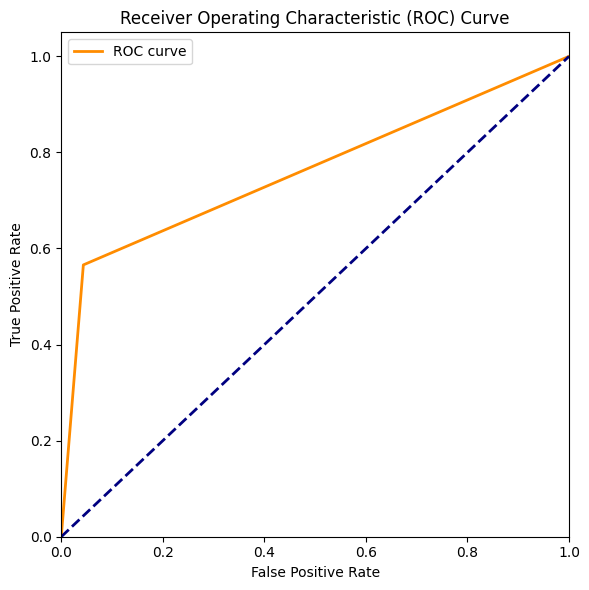

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_lr)

# Create a square figure and plot the ROC curve
plt.figure(figsize=(6, 6))  # Make it square (e.g., 6x6 inches)
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(['ROC curve'])
plt.tight_layout()

plt.show()


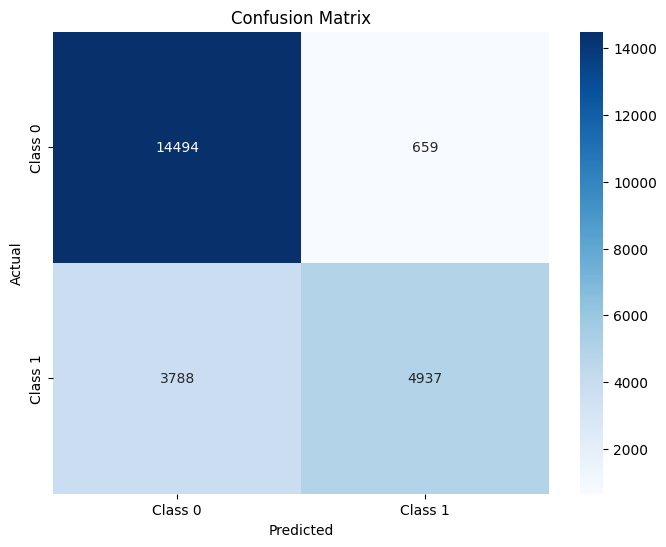

In [ ]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# <font color=green>K Nearest Neighbors</font>

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.8974788508250272
Confusion Matrix : 
[[14637   516]
 [ 1932  6793]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     15153
           1       0.93      0.78      0.85      8725

    accuracy                           0.90     23878
   macro avg       0.91      0.87      0.89     23878
weighted avg       0.90      0.90      0.90     23878



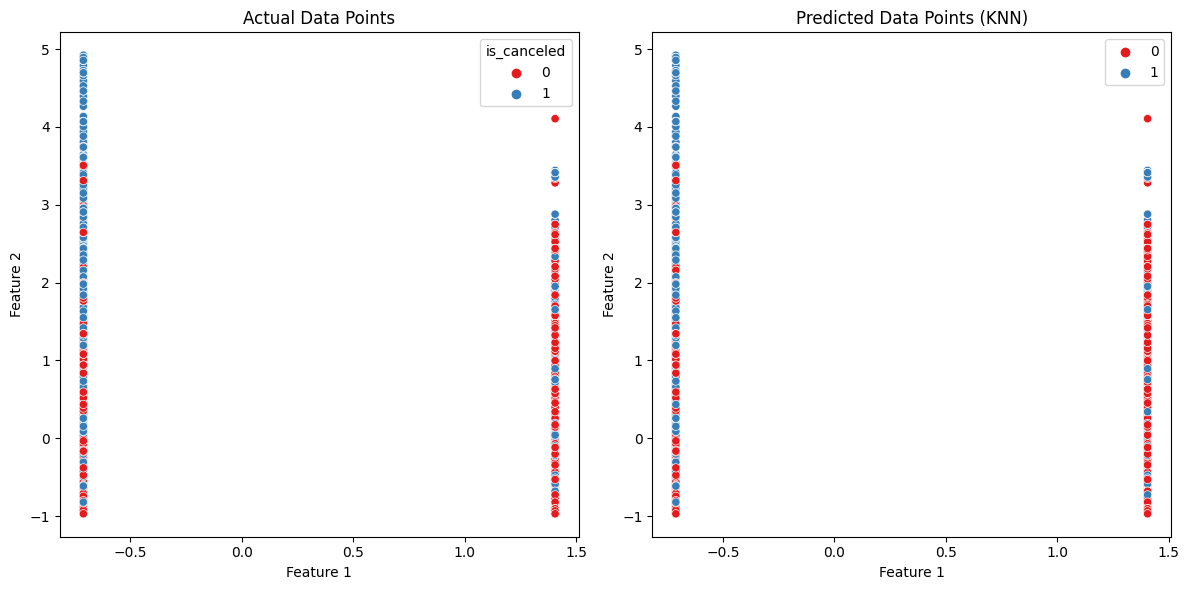

In [ ]:
plt.figure(figsize=(12, 6))

# Create a scatter plot of the test data points
plt.subplot(1, 2, 1)
sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], hue=y_test, palette="Set1")
plt.title("Actual Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Create a scatter plot of the predicted data points
plt.subplot(1, 2, 2)
sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], hue=y_pred_knn, palette="Set1")
plt.title("Predicted Data Points (KNN)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

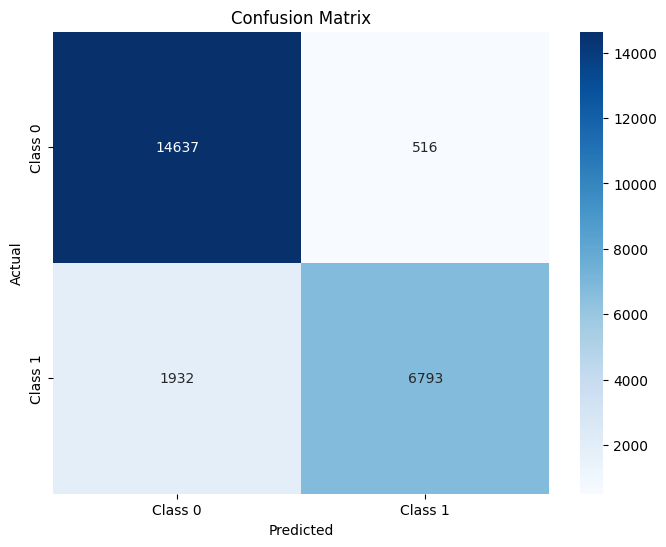

In [ ]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# <font color=green>Random Forest Classifier</font>

In [ ]:

rd_clf = RandomForestClassifier()
rd_clf.fit(x_train, y_train)

y_pred_rd_clf = rd_clf.predict(x_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9478180752156797
Confusion Matrix : 
[[15105    48]
 [ 1198  7527]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15153
           1       0.99      0.86      0.92      8725

    accuracy                           0.95     23878
   macro avg       0.96      0.93      0.94     23878
weighted avg       0.95      0.95      0.95     23878



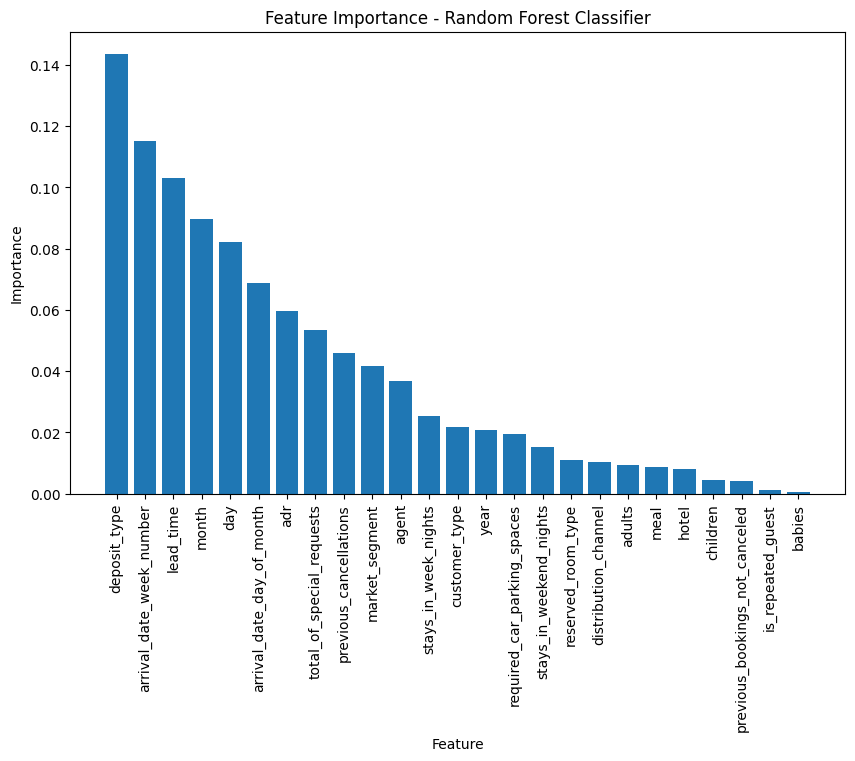

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = rd_clf.feature_importances_

# Get feature names
features = x.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest Classifier')
plt.show()

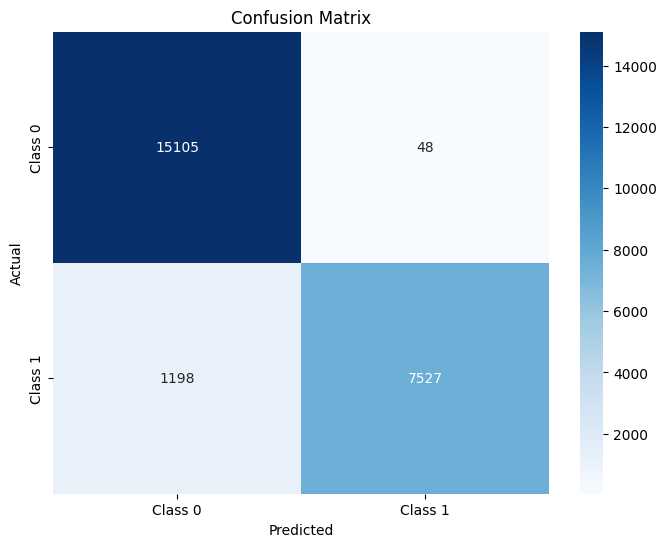

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **DECISION_TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# <font color=green>Decision Tree Classifier</font>

dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

y_pred_dt_clf = dt_clf.predict(x_test)

acc_dt_clf = accuracy_score(y_test, y_pred_dt_clf)
conf = confusion_matrix(y_test, y_pred_dt_clf)
clf_report = classification_report(y_test, y_pred_dt_clf)

print(f"Accuracy Score of Decision Tree Classifier is : {acc_dt_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")


Accuracy Score of Decision Tree Classifier is : 0.9315269285534802
Confusion Matrix : 
[[14380   773]
 [  862  7863]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     15153
           1       0.91      0.90      0.91      8725

    accuracy                           0.93     23878
   macro avg       0.93      0.93      0.93     23878
weighted avg       0.93      0.93      0.93     23878



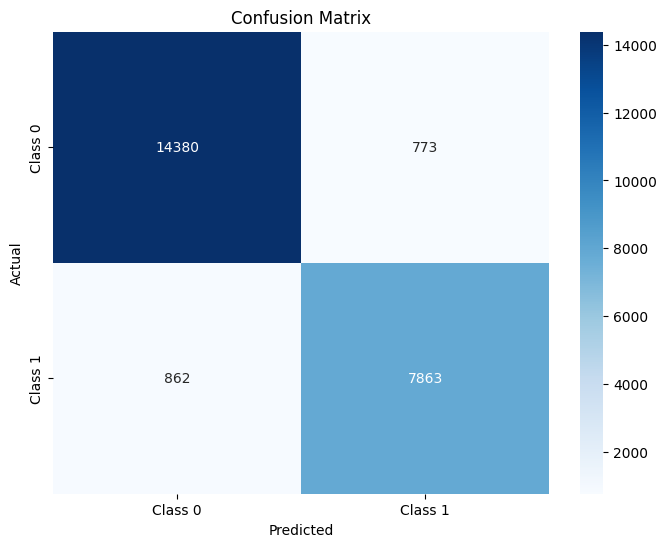

In [ ]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

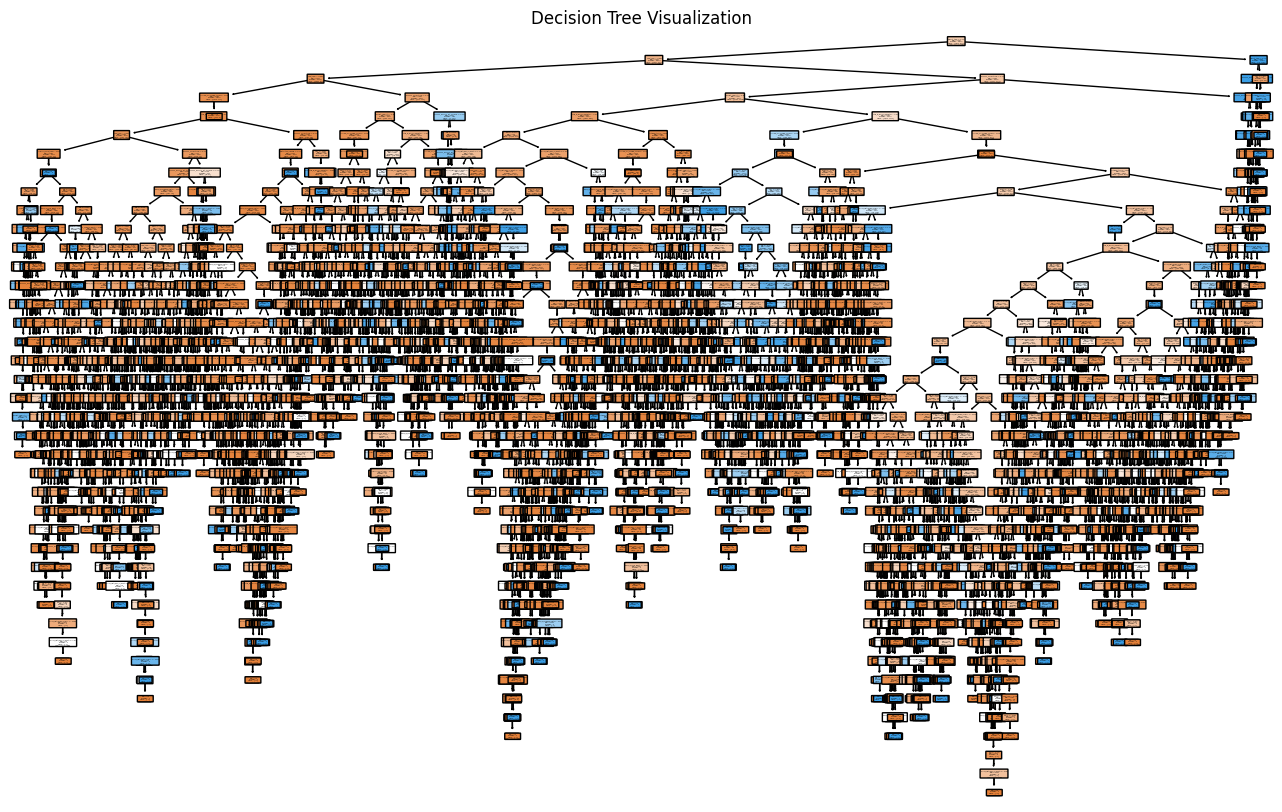

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 10))
plot_tree(dt_clf, feature_names=x.columns, class_names=["Not Canceled", "Canceled"], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


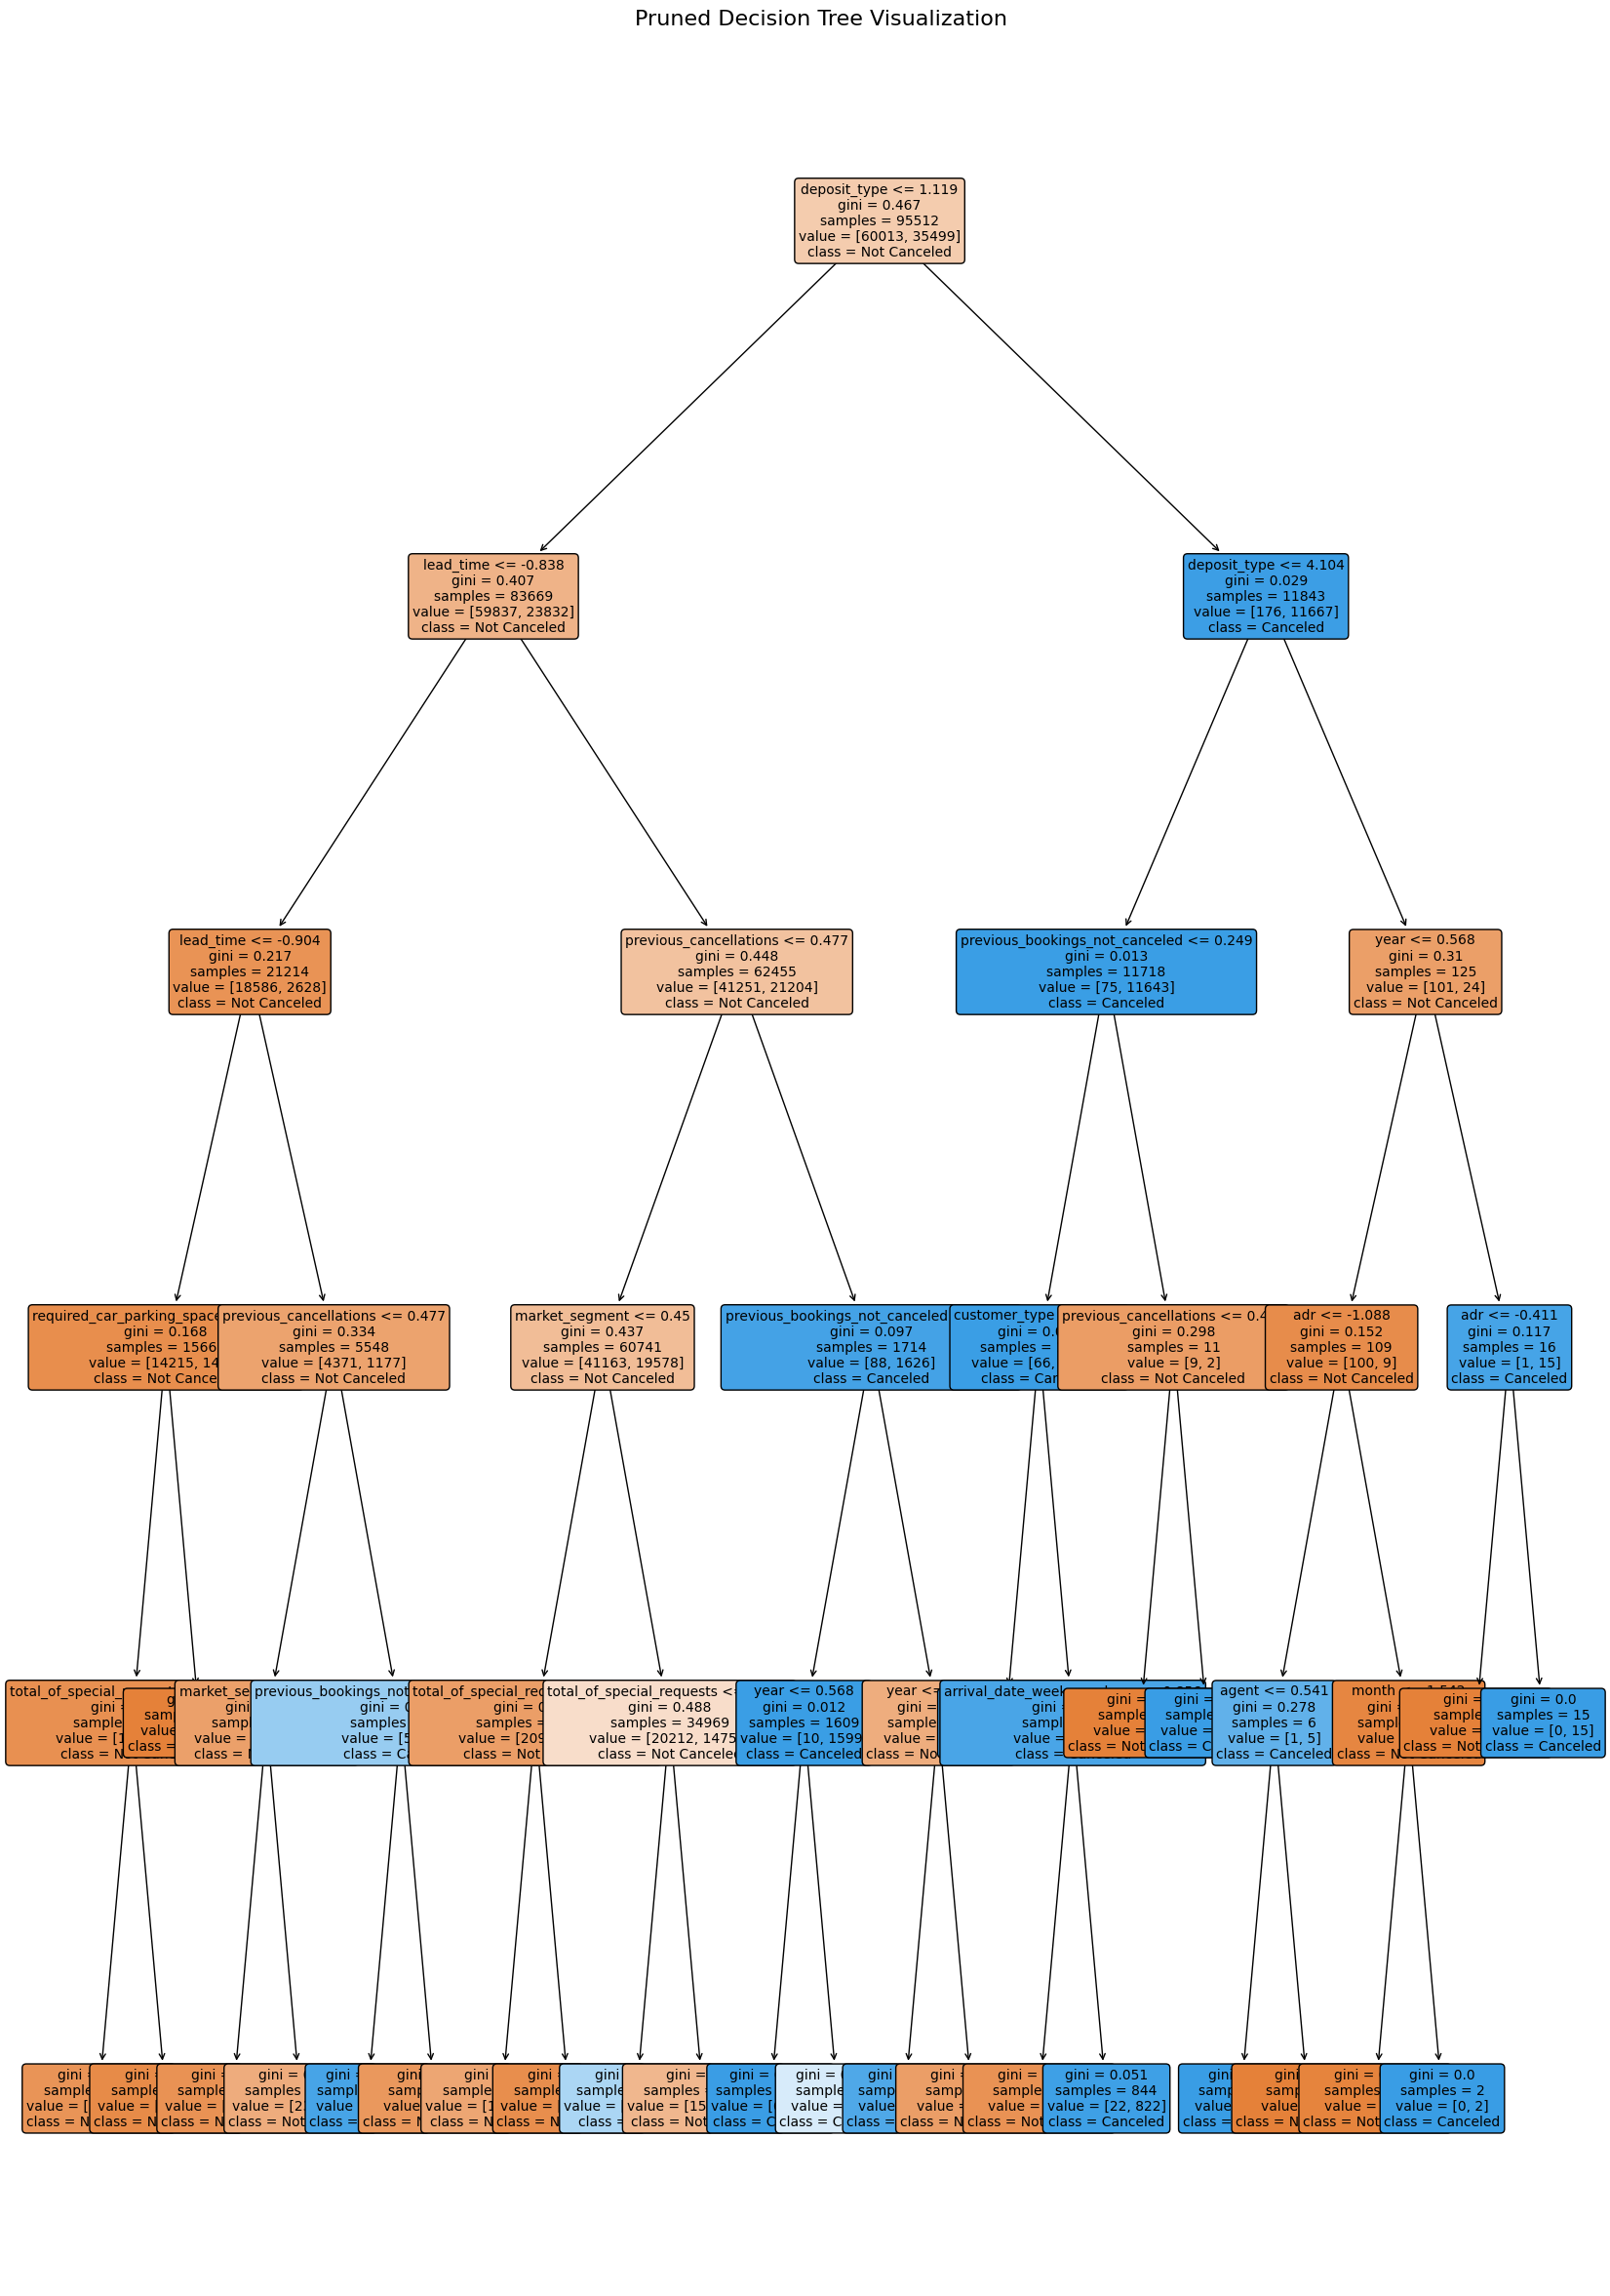

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create a Decision Tree with a limited depth (e.g., max_depth=5)
dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(x_train, y_train)

# Increase the figure size for a larger visualization
plt.figure(figsize=(20, 30))

# Plot the Decision Tree with adjusted parameters
plot_tree(dt_clf, feature_names=x.columns, class_names=["Not Canceled", "Canceled"], filled=True, rounded=True, fontsize=10)

# Adjust title and show the plot
plt.title('Pruned Decision Tree Visualization', fontsize=16)
plt.show()

# <font color=purple>Models Comparison</font>

In [ ]:
# <font color=purple>Models Comparison</font>

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Random Forest Classifier', 'Decision Tree Classifier'],
    'Score': [acc_lr, acc_knn, acc_rd_clf, acc_dt_clf]
})

In [ ]:
models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest Classifier,0.947818
3,Decision Tree Classifier,0.931527
1,KNN,0.897479
0,Logistic Regression,0.813762


In [ ]:
import plotly.express as px

# <font color=blue>Models Comparison</font>

models_sorted = models.sort_values(by='Score', ascending=True)

fig = px.bar(
    data_frame=models_sorted,
    x='Score',
    y='Model',
    color='Score',
    template='plotly_dark',
    title='Models Comparison'
)

fig.update_traces(texttemplate='%{x:.2f}', textposition='outside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

fig.show()

# <font color=blue>We got accuracy score of 94.7%</font>

---

